$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan aquí son las siguientes: 

In [1]:
import uproot
import ROOT
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.22/06


Para ver como se pueden guardar y leer archivos.root usando uproot creemos un histograma de una distribución gaussiana, esto se puede hacer de dos formas, usando numpy y usando ROOT

In [2]:
Gaussian = np.random.normal(90, 20, 100000)

Grafiquemoslo usando matplotlib:

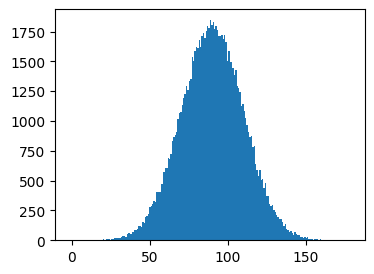

In [3]:
fig = plt.figure(figsize = (4,3))
plt.hist(Gaussian, bins = 200)
plt.show()

Ahora creemos un TH1F con ROOT y grafiquemoslo:

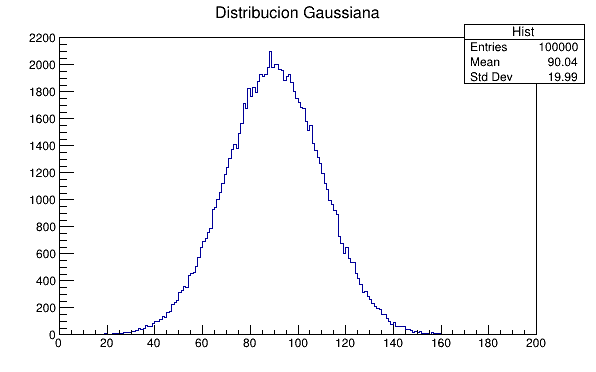

In [4]:
Histograma = ROOT.TH1F("Hist","Distribucion Gaussiana", 200,0,200)
Histograma.SetDirectory(0)


for value in Gaussian: Histograma.Fill(value)

canvas = ROOT.TCanvas("Canvas", " ", 600, 400)
Histograma.Draw('hist')
canvas.Draw()

Hecho esto, ahora podemos evidenciar una gran utilidad de usar uproot para guardar histogramas en archivos.root

Uproot permite guardar histogramas creados tanto por numpy como por ROOT, en general la sintaxis para crear un archivo.root y guardar algo es la siguiente:

In [5]:
file = uproot.recreate('Gaussian.root') #Se crea el archivo.root, si se quisiera actualizar en lugar de crearlo desde 0 se usa uproot.update
 
file["ROOT/hist"] = Histograma #el / es para guardar en subdirectorios dentro del archivo.root
file["Numpy/hist"] = np.histogram(Gaussian, bins= 200)

file.close() #Se cierra el archivo.root

Esto nos motiva a crear la siguiente función:

In [6]:
def guardar_uproot(nombre_archivo, ruta, histograma, actualizar = False):
    #Esta función permite guardar un histograma ya sea creado por ROOT o por Numpy, en un archivo.root
    
    #nombre_archivo: nombre del archivo.root
    #ruta: ruta que tendrá el histograma dentro del archivo.root, si se quieren tener subdirectorios se usa "/"
    #histograma: histograma que se va a guardar en el archivo.root
    #actualizar: Boolean que permite saber si se necesita actualizar el archivo.root o en su defecto crearlo desde 0
    
    if actualizar: file = uproot.update(nombre_archivo) #Así no se borra todo lo que ya está en el .root
    else: file = uproot.recreate(nombre_archivo) 
    
    file[ruta] = histograma
    file.close() 
    
    print(f"El histograma ha sido guardado en {nombre_archivo}")

Así, guardar los histogramas se reduce a usar la función:

In [7]:
guardar_uproot('Gaussian.root', "ROOT/hist", Histograma)
guardar_uproot('Gaussian.root', "Numpy/hist", Histograma, actualizar = True)

El histograma ha sido guardado en Gaussian.root
El histograma ha sido guardado en Gaussian.root


Es claro que en este caso da igual escribir el código o usar la función; sin embargo, si se tuviera una gran cantidad de histogramas, tener una función de este estilo puede resultar muy útil.

Ahora leamos el archivo:

In [8]:
file = uproot.open('Gaussian.root')

Luego, para extraer los objetos (en este caso histogramas) que contiene hay que hacer uso de sus keys (similar a como se trabaja usando diccionarios):

In [9]:
file.keys()

['ROOT;1', 'ROOT/hist;1', 'Numpy;1', 'Numpy/hist;1']

Así,

In [10]:
Histograma_Numpy = file['Numpy/hist']
Histograma_ROOT = file['ROOT/hist']

Veamos que efectivamente corresponden a lo que uno esperaría:

In [11]:
print(Histograma_Numpy, Histograma_ROOT)

<TH1F (version 3) at 0x7f2cc86d3d90> <TH1F (version 3) at 0x7f2c6556db80>


Ahora, para graficarlos cree la siguiente función:

In [12]:
def graficar(Histograma, c = "orange", nbins = 200):
    #Esta función permite graficar un histograma extraído del archivo.root
    
    #Histograma: Histograma que se quiere graficar, por ejemplo file['Matplotlib/hist']
    #c (parametro opcional): Color
    #nbins (parametro opcional): Número de Bins
    
    pesos = Histograma.to_numpy()[0] #Extrae los pesos asociados a cada bin del histograma
    valores = Histograma.to_numpy()[1] #Extrae los extremos de todos los bines, por lo que para graficar el histograma, debemos promediar cada pareja, así tendremos el centro de cada bin al que podremos asociarle el peso

    #Hagamos eso, creemos un arreglo para guardar esos promedios (centros de cada bin)
    promedios = []
    for i in range(len(valores) - 1 ):
        promedio = (valores[i] + valores[i+1])/2
        promedios.append(promedio)
    
    #Finalmente, es posible graficar usando matplotlib:    
    fig = plt.figure(figsize = (4,3))
    plt.hist(promedios, weights=pesos, bins = nbins, color = c)
    plt.show()

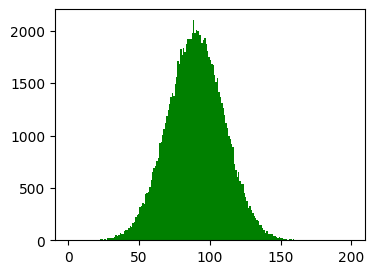

In [13]:
graficar(Histograma_Numpy, c = "green")

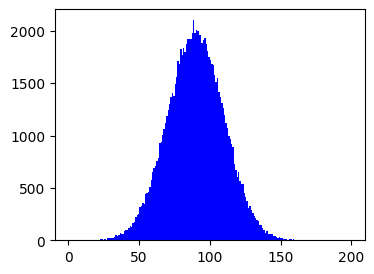

In [14]:
graficar(Histograma_ROOT, c = "blue")

Como se esperaría, ambos histogramas lucen iguales.

Este razonamiento para guardar y leer archivos .root se puede generalizar y complicar tanto como se requiera, pero el principio es exactamente el mismo.

**Referencias:**

- https://masonproffitt.github.io/uproot-tutorial/index.html
- https://uproot.readthedocs.io/en/latest/basic.html
